# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Output File (CSV)
output_data_file = "weatherpy/weather_df.csv"
temp_units = "imperial"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lon = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lon_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lon = np.random.uniform(lon_range[0], lon_range[1], size=1500)
lat_lngs = zip(lats, lon)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

In [5]:
# Define an empty list to fetch the weather data for each city
city_data = []

In [6]:
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------


In [7]:
# Create counters
record_count = 1
set_count = 1

In [8]:
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url ={
        "q": city,
        "appid": weather_api_key,
        "units": "metric"  # You can change units to imperial if needed
    }

    response = requests.get(url, params=city_url)
    
# Process the response data here
    # You can extract the weather information from the response JSON
    
    # Example: Print the city name and temperature
    if response.status_code == 200:
        weather_data = response.json()
        temperature = weather_data["main"]["temp"]
        lat= weather_data["coord"]["lat"]
        lon= weather_data["coord"]["lon"]
        cloud= weather_data["clouds"]["all"]
        humi= weather_data["main"]["humidity"]
        wind= weather_data["wind"]["speed"]
                
        city_data.append({
            "city":city,
            "Temperature":temperature,
            "Longitude":lon,
            "Latitude":lat,
            "Cloudiness":cloud,
            "Wind Speed":wind,
            "Humidity":humi
        })
        
        print(f"City: {city}, Windspeed: {wind}")
        print(f"City: {city}, Humidity: {humi}")
        print(f"City: {city}, Cloudiness: {cloud}")
        print(f"City: {city}, Longitude: {lon}")
        print(f"City: {city}, Latitude: {lat}")
        print(f"City: {city}, Temperature: {temperature}°C")
        print("-----------------------------")
    else:
        print(f"City: {city} not found. Status code: {response.status_code}")
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

City: sosnovo-ozerskoye, Windspeed: 1.18
City: sosnovo-ozerskoye, Humidity: 40
City: sosnovo-ozerskoye, Cloudiness: 10
City: sosnovo-ozerskoye, Longitude: 111.5418
City: sosnovo-ozerskoye, Latitude: 52.5249
City: sosnovo-ozerskoye, Temperature: 25.31°C
-----------------------------
City: kodiak, Windspeed: 4.63
City: kodiak, Humidity: 100
City: kodiak, Cloudiness: 100
City: kodiak, Longitude: -152.4072
City: kodiak, Latitude: 57.79
City: kodiak, Temperature: 9.73°C
-----------------------------
City: maloye ganyushkino, Windspeed: 2.95
City: maloye ganyushkino, Humidity: 30
City: maloye ganyushkino, Cloudiness: 0
City: maloye ganyushkino, Longitude: 49.2667
City: maloye ganyushkino, Latitude: 46.6
City: maloye ganyushkino, Temperature: 21.85°C
-----------------------------
City: thompson, Windspeed: 3.6
City: thompson, Humidity: 31
City: thompson, Cloudiness: 40
City: thompson, Longitude: -97.8558
City: thompson, Latitude: 55.7435
City: thompson, Temperature: 24.09°C
------------------

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df=pd.DataFrame(city_data)
city_data_df

# Show Record Count
city_data_df.count()

city           576
Temperature    576
Longitude      576
Latitude       576
Cloudiness     576
Wind Speed     576
Humidity       576
dtype: int64

In [10]:
# Display sample data
city_data_df

,city,Temperature,Longitude,Latitude,Cloudiness,Wind Speed,Humidity
0,sosnovo-ozerskoye,25.31,111.5418,52.5249,10,1.18,40
1,kodiak,9.73,-152.4072,57.7900,100,4.63,100
2,maloye ganyushkino,21.85,49.2667,46.6000,0,2.95,30
3,thompson,24.09,-97.8558,55.7435,40,3.60,31
4,i-n-salah,36.55,2.4607,27.1935,83,4.35,9
...,...,...,...,...,...,...,...
571,kharkhorin,22.25,102.8238,47.1975,0,1.50,40
572,huarmey,18.39,-78.1522,-10.0681,45,3.95,85
573,archangelos,25.99,28.1149,36.2149,0,2.76,56
574,ko pha ngan,26.38,100.0291,9.7578,100,6.40,77


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df

,city,Temperature,Longitude,Latitude,Cloudiness,Wind Speed,Humidity
City_ID,,,,,,,
0,sosnovo-ozerskoye,25.31,111.5418,52.5249,10,1.18,40
1,kodiak,9.73,-152.4072,57.7900,100,4.63,100
2,maloye ganyushkino,21.85,49.2667,46.6000,0,2.95,30
3,thompson,24.09,-97.8558,55.7435,40,3.60,31
4,i-n-salah,36.55,2.4607,27.1935,83,4.35,9
...,...,...,...,...,...,...,...
571,kharkhorin,22.25,102.8238,47.1975,0,1.50,40
572,huarmey,18.39,-78.1522,-10.0681,45,3.95,85
573,archangelos,25.99,28.1149,36.2149,0,2.76,56


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

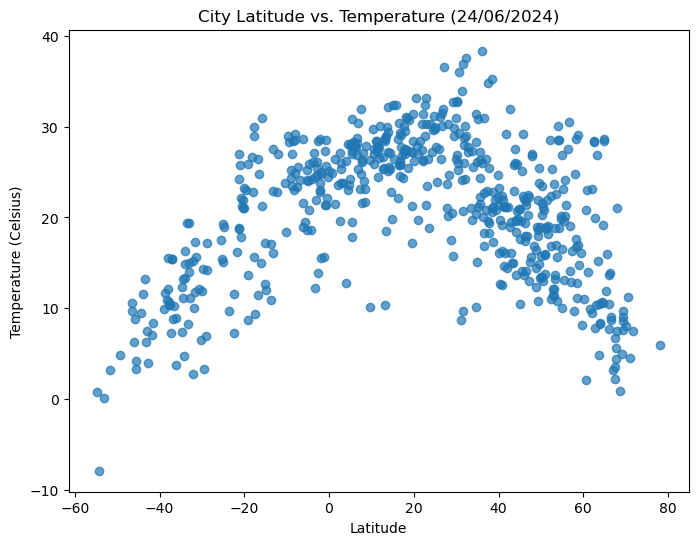

In [13]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Latitude'], city_data_df['Temperature'], alpha=0.7)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature (Celsius)')
plt.title('City Latitude vs. Temperature (24/06/2024)')

# Save the figure
plt.savefig("output_data/Latitude vs. Temperature .png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

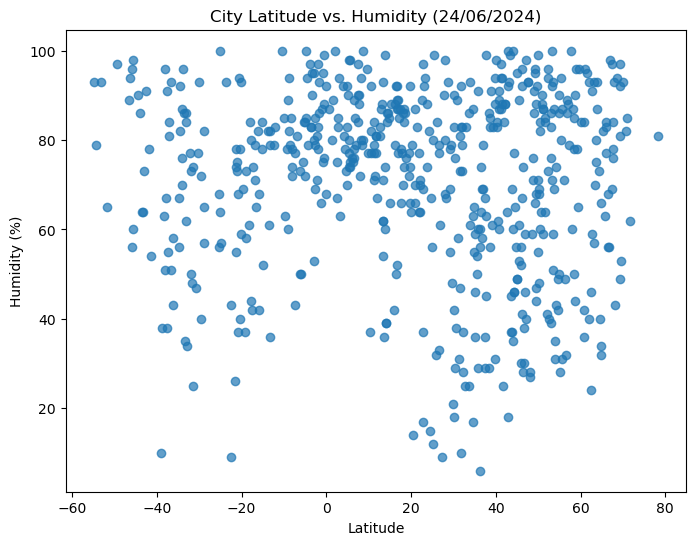

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'], alpha=0.7)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (24/06/2024)')

# Save the figure
plt.savefig("output_data/Latitude vs. Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

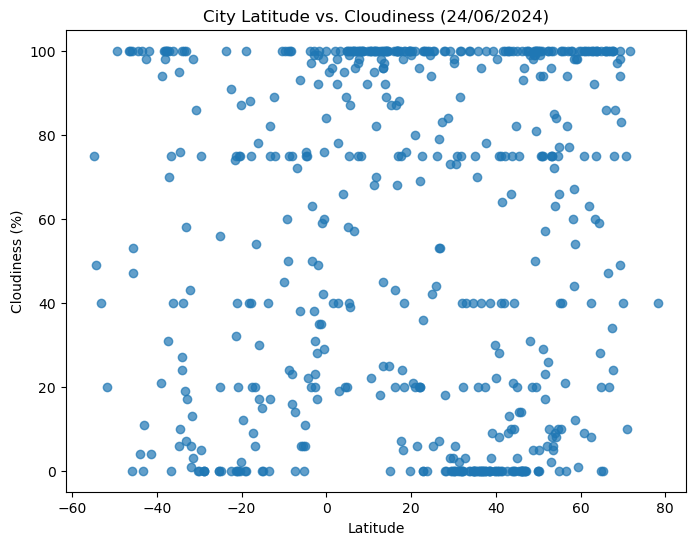

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness'], alpha=0.7)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (24/06/2024)')

# Save the figure
plt.savefig("output_data/Latitude vs. Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

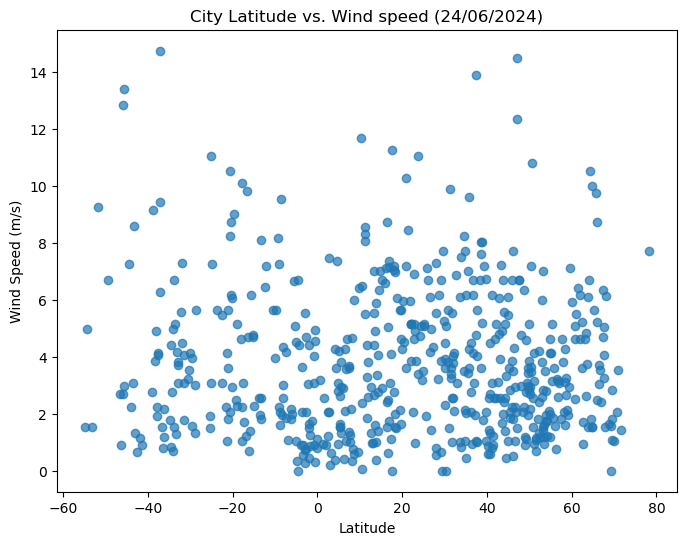

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed'], alpha=0.7)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind speed (24/06/2024)')

# Save the figure
plt.savefig("output_data/Latitude vs. Wind speed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
def createchart(df, y_col, coord, label=None, title=None):  
    x = df["Latitude"]
    y = df[y_col]
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    r_squared = rvalue ** 2
        
    plt.scatter(x, y, edgecolors="blue", color="lightblue")
    plt.plot(x, regress_values, "c-")
    plt.annotate(line_eq, coord, fontsize=15, color="black")
    
    plt.xlabel('Latitude')
    if label:
        plt.ylabel(label)
    if title:
        plt.title(title)
    
    plt.show()
    print(f"R squared: {r_squared}")

In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Latitude"]>=0]

# Display sample data
northern_hemi_df.head()

,city,Temperature,Longitude,Latitude,Cloudiness,Wind Speed,Humidity
City_ID,,,,,,,
0,sosnovo-ozerskoye,25.31,111.5418,52.5249,10,1.18,40
1,kodiak,9.73,-152.4072,57.7900,100,4.63,100
2,maloye ganyushkino,21.85,49.2667,46.6000,0,2.95,30
3,thompson,24.09,-97.8558,55.7435,40,3.60,31
4,i-n-salah,36.55,2.4607,27.1935,83,4.35,9


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Latitude"]<0]

# Display sample data
southern_hemi_df.head()

,city,Temperature,Longitude,Latitude,Cloudiness,Wind Speed,Humidity
City_ID,,,,,,,
7,ushuaia,0.81,-68.3000,-54.8000,75,1.54,93
9,cooma,3.80,149.1333,-36.2333,100,2.18,58
11,port alfred,19.35,26.8910,-33.5906,100,5.14,86
12,grytviken,-7.90,-36.5092,-54.2811,49,4.99,79
14,adamstown,19.25,-130.1015,-25.0660,56,11.07,64


###  Temperature vs. Latitude Linear Regression Plot

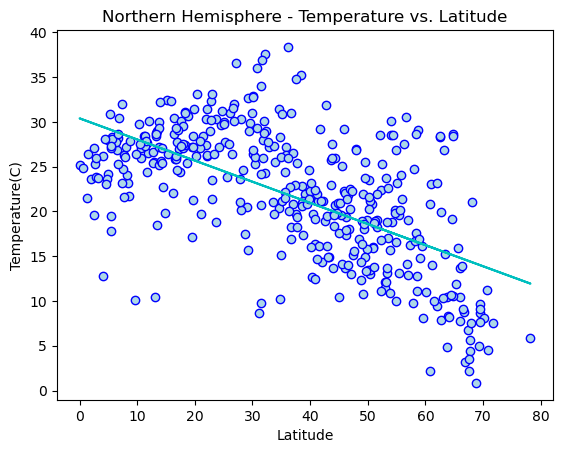

R squared: 0.3848956373961493


In [46]:
# Linear regression on Northern Hemisphere
createchart(northern_hemi_df,"Temperature",(10,-20), label="Temperature(C)", title="Northern Hemisphere - Temperature vs. Latitude")

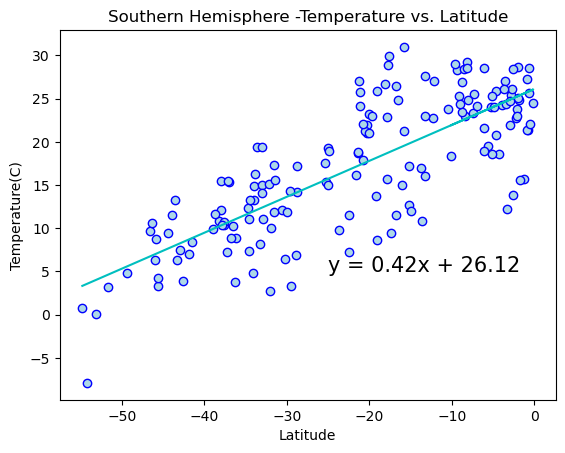

R squared: 0.6205307789892067


In [47]:
# Linear regression on Southern Hemisphere
createchart(southern_hemi_df, "Temperature", (-25, 5), label="Temperature(C)", title="Southern Hemisphere -Temperature vs. Latitude")

**Discussion about the linear relationship:** 
There is a marginal linear relationship of R_sqaured = 0.62 between Southern Hemisphere -Temperature vs. Latitude.
Northern Hemisphere - Temperature vs. Latitude however has a weak correlation of only R_sqaured = 0.38

### Humidity vs. Latitude Linear Regression Plot

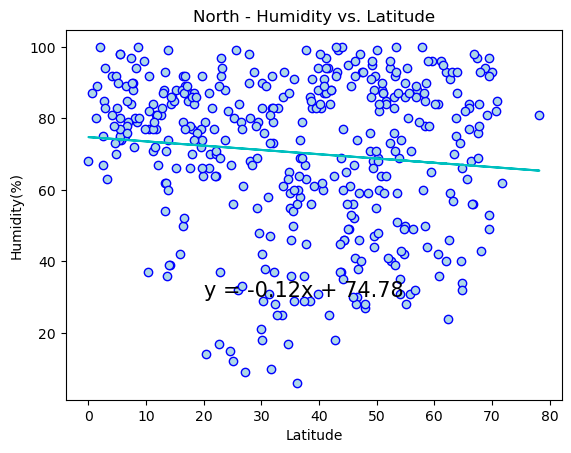

R squared: 0.01139192547762542


In [48]:
# Northern Hemisphere
createchart(northern_hemi_df,"Humidity",(20,30), label="Humidity(%)", title="North - Humidity vs. Latitude")
plt.show()

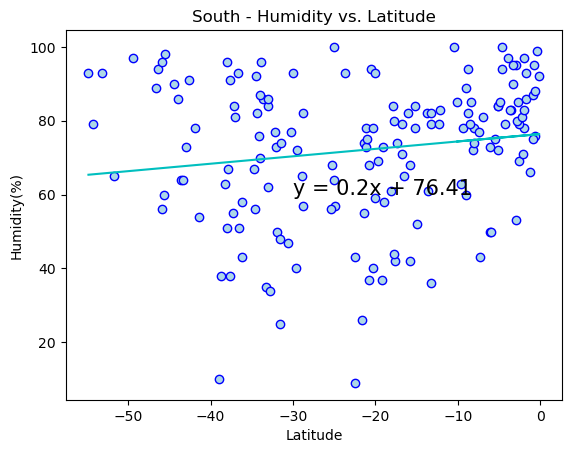

R squared: 0.02476155655424764


In [49]:
# Southern Hemisphere
createchart(southern_hemi_df,"Humidity",(-30,60), label="Humidity(%)", title="South - Humidity vs. Latitude")
plt.show()

**Discussion about the linear relationship:** 
There is no linear relationship between Humidity vs. Latitude in either northern or southern Hemisphere with  South R squared: 0.02 and R squared: 0.01 North.

### Cloudiness vs. Latitude Linear Regression Plot

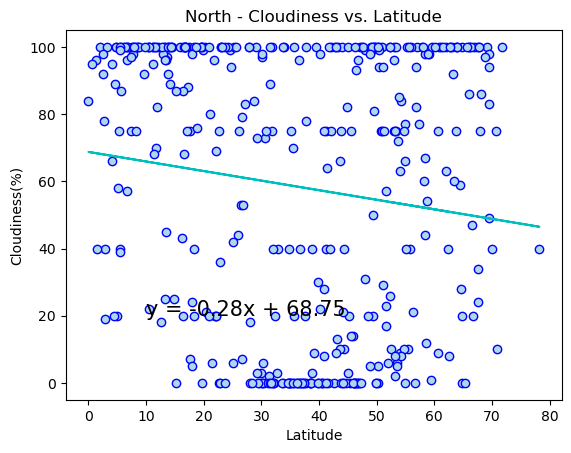

R squared: 0.017832752337256758


In [50]:
# Northern Hemisphere
createchart(northern_hemi_df,"Cloudiness",(10,20), label="Cloudiness(%)", title="North - Cloudiness vs. Latitude")
plt.show()

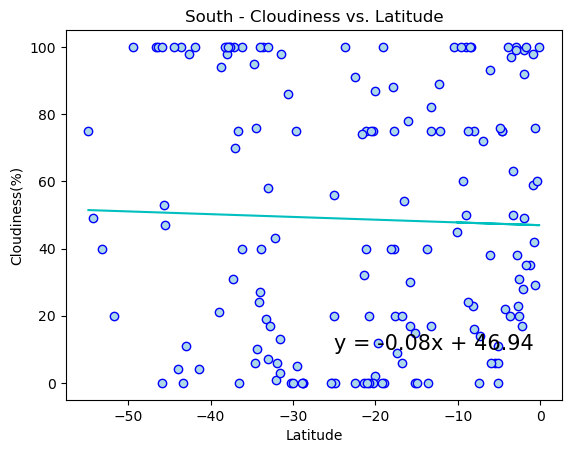

R squared: 0.001036933959195096


In [51]:
# Southern Hemisphere
createchart(southern_hemi_df,"Cloudiness",(-25,10), label="Cloudiness(%)", title="South - Cloudiness vs. Latitude")
plt.show()

**Discussion about the linear relationship:** There is no linear relationship between Cloudiness vs. Latitude in either northern or southern Hemisphere with  South R squared: 0.001 and R squared: 0.017 North.

### Wind Speed vs. Latitude Linear Regression Plot

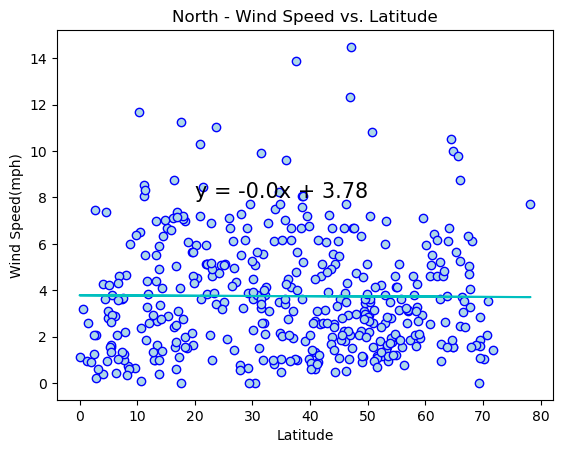

R squared: 5.7668887135557924e-05


In [54]:
# Northern Hemisphere
createchart(northern_hemi_df,"Wind Speed",(20,8), label="Wind Speed(mph)", title="North - Wind Speed vs. Latitude")
plt.show()

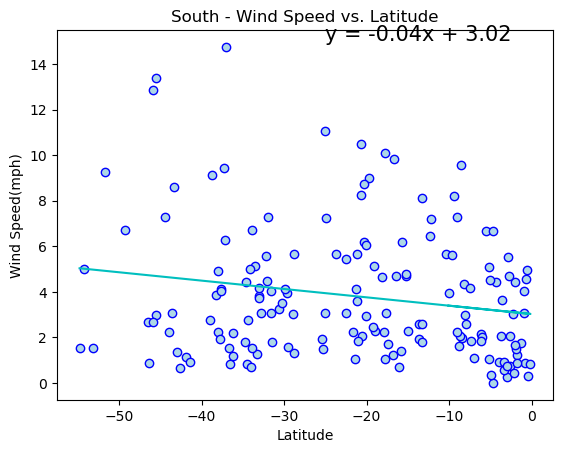

R squared: 0.036430848376295656


In [55]:
# Southern Hemisphere
createchart(southern_hemi_df,"Wind Speed",(-25,15), label="Wind Speed(mph)", title="South - Wind Speed vs. Latitude")
plt.show()

**Discussion about the linear relationship:** Again there is no linear relationship between Wind Speed vs. Latitude in either northern or southern Hemisphere with  South R squared: 0.03 and R squared: 0.0005 North.